<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/main/01-intro/DistanceBetweenRandomPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from typing import Tuple
from tqdm import tqdm

Let's check how average distance between two points uniformly distributied in a unit N-dimensional cube depends on the dimensionality.

In [ ]:
def run_experiment(
  sample_size: int,
  dimensionality: int,
) -> Tuple[float, float]:
  """
  Runs an experiment and returns the average distance and its standard error.
  """
  points_A, points_B = np.random.uniform(size=(2, sample_size, dimensionality))
  distances = ((points_A - points_B)**2).sum(axis=-1)**0.5
  return distances.mean(), distances.std(ddof=1) / sample_size**0.5

In [ ]:
dimensionalities = 2**np.arange(11)

avg_dists, avg_dist_errs = zip(
    *(run_experiment(100, d) for d in tqdm(dimensionalities))
)

100%|██████████| 11/11 [00:00<00:00, 1214.84it/s]


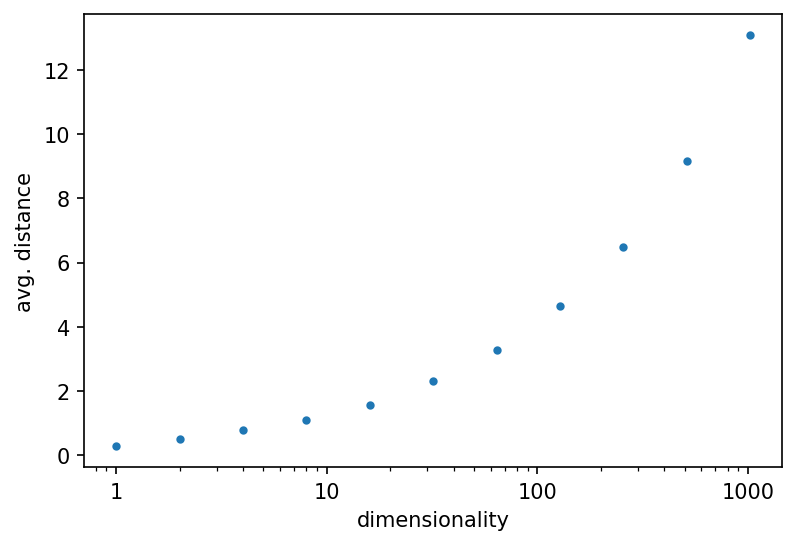

In [ ]:
plt.figure(dpi=150)

plt.errorbar(dimensionalities, avg_dists, yerr=avg_dist_errs, fmt=".")

plt.xscale("log");
plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.ylabel("avg. distance")
plt.xlabel("dimensionality");